question 1

In [1]:
import pandas as pd
import pandas_datareader.data as web
import datetime

def gather_data(data_codes, start, end = datetime.datetime.today(), freq = "A"):
    i = 0
    # dct.items() calls key and value that key points to
    for key, val in data_codes.items():
        if i == 0:
            # Create dataframe for first variable, then rename column
            df = web.DataReader(val, "fred", start, end).resample(freq).mean()
            df.rename(columns = {val:key}, inplace = True) 
            # setting i to None will cause the next block of code to execute,
            # placing data within df instead of creating a new dataframe for
            # each variable
            i = None
        else:
            # If dataframe already exists, add new column
            df[key] = web.DataReader(val, "fred", start, end).resample(freq).mean()

    return df

In [2]:
data_codes  = {"Black Unemployment": "LNS14000006",
               "UNRATE": "UNRATE"}
start = datetime.datetime(1950, 7, 1)
end = datetime.datetime.today()
data = gather_data(data_codes = data_codes, start = start, end = end, freq = "M")

In [3]:
data["Time"] = [i for i in range(1, len(data.index) + 1)]

In [4]:
print(data)

            Black Unemployment  UNRATE  Time
DATE                                        
1972-01-31                11.2     5.8     1
1972-02-29                11.2     5.7     2
1972-03-31                10.7     5.8     3
1972-04-30                 9.8     5.7     4
1972-05-31                10.2     5.7     5
1972-06-30                10.2     5.7     6
1972-07-31                10.5     5.6     7
1972-08-31                10.6     5.6     8
1972-09-30                10.4     5.5     9
1972-10-31                10.6     5.6    10
1972-11-30                10.0     5.3    11
1972-12-31                 9.4     5.2    12
1973-01-31                 9.1     4.9    13
1973-02-28                 9.5     5.0    14
1973-03-31                 9.4     4.9    15
1973-04-30                 9.9     5.0    16
1973-05-31                 9.6     4.9    17
1973-06-30                 9.8     4.9    18
1973-07-31                 9.8     4.8    19
1973-08-31                 9.2     4.8    20
1973-09-30

In [5]:
from regression import Regression
reg = Regression()
print(reg)

You created an instance of Stats


In [6]:
import pandas as pd  
import copy
from stats import *    
  
class Regression:  
    def __init__(self):  
        self.stats = stats()  
          
    def OLS(self, reg_name, data, y_name, beta_names, 
            min_val = 0,  
                max_val = None, constant = True):  
        self.min_val = min_val  
        if max_val != None:  
            self.max_val = max_val  
        else:  
            self.max_val = len(data)  
        self.reg_name = reg_name  
        self.y_name = y_name  
        self.beta_names = copy.copy(beta_names)
        self.data = data.copy()  
        if constant:  
            self.add_constant()  
  
    def add_constant(self):  
        self.data["Constant"] = 1  
        self.beta_names.append("Constant")

In [7]:
import pandas as pd
from regression import Regression

In [8]:
reg = Regression()
print(reg)

You created an instance of Stats


In [9]:
reg

In [10]:
y_var = ["UNRATE"]
x_vars = ["Time"]

reg.OLS(reg_name = "Unemployment Rate Over Time", data = data, y_name = y_var, beta_names = x_vars)
reg.data

,Black Unemployment,UNRATE,Time,Constant,UNRATE estimator
DATE,,,,,
1972-01-31,11.2,5.8,1,1,6.872133
1972-02-29,11.2,5.7,2,1,6.870081
1972-03-31,10.7,5.8,3,1,6.868028
1972-04-30,9.8,5.7,4,1,6.865976
1972-05-31,10.2,5.7,5,1,6.863924
1972-06-30,10.2,5.7,6,1,6.861872
1972-07-31,10.5,5.6,7,1,6.859820
1972-08-31,10.6,5.6,8,1,6.857768
1972-09-30,10.4,5.5,9,1,6.855716


In [11]:
import numpy as np
# . . . 
def OLS(self, reg_name, data, y_name, beta_names, min_val = 0,  
            max_val = None, constant = True):  
    self.min_val = min_val  
    if max_val != None:  
        self.max_val = max_val  
    else:  
        self.max_val = len(data)  
    self.reg_name = reg_name  
    self.y_name = y_name  
    self.beta_names = copy.copy(beta_names)
    self.data = data.copy()  
    if constant:  
        self.add_constant()  
    self.build_matrices()
    self.estimate_betas_and_yhat()
    
def build_matrices(self):  
    # Transform dataframes to matrices  
    self.y = np.matrix(self.data[self.y_name][self.min_val:self.max_val])  
    # create a k X n nested list containg vectors for each exogenous var  
    self.X = np.matrix(self.data[self.beta_names])  
    self.X_transpose = np.matrix(self.X).getT()  
    # (X'X)**-1  
    X_transp_X = np.matmul(self.X_transpose, self.X)  
    self.X_transp_X_inv = X_transp_X.getI()  
    # X'y  
    self.X_transp_y = np.matmul(self.X_transpose, self.y)  

def estimate_betas_and_yhat(self):  
    # betas = (X'X)**-1 * X'y  
    self.betas = np.matmul(self.X_transp_X_inv, self.X_transp_y)  
    # y-hat = X * betas  
    self.y_hat = np.matmul(self.X, self.betas)  
    # Create a column that holds y-hat values  
    self.data[self.y_name[0] + " estimator"] = \
        [i.item(0) for i in self.y_hat]  
    # create a table that holds the estimated coefficient  
    # this will also be used to store SEs, t-stats,and p-values  
    self.estimates = pd.DataFrame(self.betas, index = self.beta_names,  
                                  columns = ["Coefficient"])  
    # identify y variable in index  
    self.estimates.index.name = "y = " + self.y_name[0]

In [12]:
reg = Regression()
reg.OLS("Unemployment Rate Over Time", data, y_var, x_vars)

You created an instance of Stats


In [13]:
reg.estimates

,Coefficient,SE,t-stat,p-value,significance
y = UNRATE,,,,,
Time,-0.002052,0.000404,-5.077155,0.0,***
Constant,6.874185,0.137154,50.120139,0.0,***


In [14]:
print(reg.ssr, reg.sse, reg.sst)

70.9784705684069 1613.5533863310839 1684.5318568994887


In [15]:
def calculate_regression_stats(self):
    self.sum_square_stats()
    self.calculate_degrees_of_freedom()
    self.calculate_estimator_variance()
    self.calculate_covariance_matrix()

def calculate_degrees_of_freedom(self):   
    self.lost_degrees_of_freedom = len(self.estimates)  
    self.num_obs = self.max_val + 1 - self.min_val  
    self.degrees_of_freedom = self.num_obs - self.lost_degrees_of_freedom  
         
def calculate_estimator_variance(self):  
    self.estimator_variance = self.sse / self.degrees_of_freedom  

def calculate_covariance_matrix(self):  
    self.cov_matrix = float(self.estimator_variance) * self.X_transp_X_inv  
    self.cov_matrix = pd.DataFrame(self.cov_matrix,  
                                   columns = self.beta_names,  
                                   index = self.beta_names)

In [16]:
reg = Regression()
reg.OLS("Unemployment Rate Over Time", data, y_var, x_vars)

You created an instance of Stats


In [17]:
reg.ssr, reg.sse, reg.sst

reg.stats_DF

,Estimation Statistics
r**2,0.042135
f-stat,25.777507
Est Var,2.753504
rootMSE,1.659369
SSE,1613.553386
SSR,70.978471
SST,1684.531857
Obs.,588.000000
DOF,586.000000


In [18]:
reg.cov_matrix.to_csv("regCovMatrix.csv")
reg.cov_matrix

,Time,Constant
Time,1.633631e-07,-0.000048
Constant,-4.802875e-05,0.018811


question 2

In [19]:
reg.data

,Black Unemployment,UNRATE,Time,Constant,UNRATE estimator
DATE,,,,,
1972-01-31,11.2,5.8,1,1,6.872133
1972-02-29,11.2,5.7,2,1,6.870081
1972-03-31,10.7,5.8,3,1,6.868028
1972-04-30,9.8,5.7,4,1,6.865976
1972-05-31,10.2,5.7,5,1,6.863924
1972-06-30,10.2,5.7,6,1,6.861872
1972-07-31,10.5,5.6,7,1,6.859820
1972-08-31,10.6,5.6,8,1,6.857768
1972-09-30,10.4,5.5,9,1,6.855716


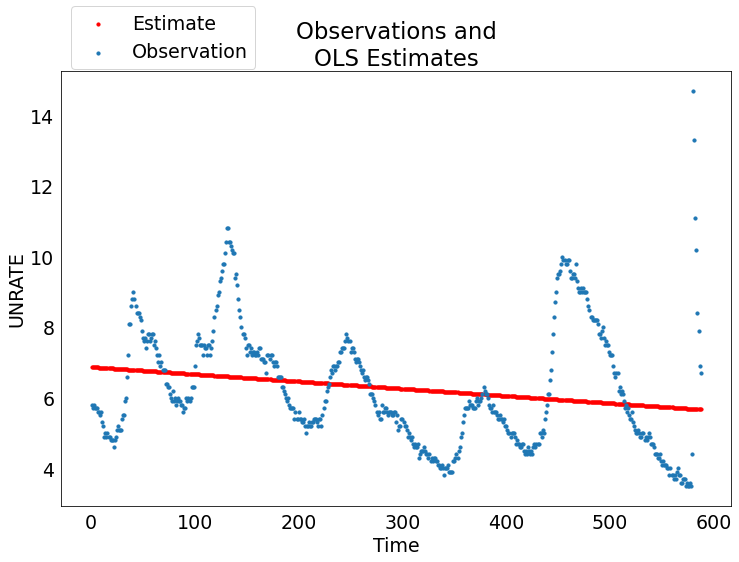

In [20]:
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
pp = PdfPages("UNRATE.pdf")

def plot_scatter_with_estimator(title, data, x_vars, y_var, pp = None):
    # set default font size
    fig = plt.rcParams.update({"font.size":19})
    
    # use a loop to call each exogenous
    y = y_var[0]
    for x in x_vars:
        fig, ax = plt.subplots(figsize=(12,8))
        y_label1 = "Estimate"
        y_label2 = "Observation"
        data.plot.scatter(x=x, y=y + " estimator", ax = ax, c = "r",
                         s = 10, label = y_label1, legend = False)
        
        # erase the y_axis label so that "estimtor" is not present
        plt.ylabel("")
        data.plot.scatter(x = x, y = y, ax = ax, s = 10, 
                          label = y_label2, legend = False)
        plt.legend(loc="upper left", labels = [y_label1, y_label2],
                  bbox_to_anchor = (0, 1.17))
        
        plt.title("Observations and\nOLS Estimates")
        # remove lines marking unit on the axis
        ax.xaxis.set_ticks_position("none")
        ax.yaxis.set_ticks_position("none")
        pp.savefig(fig, bbox_inches = "tight")
plot_scatter_with_estimator("Plot", reg.data, x_vars, y_var, pp)
pp.close()

question 3

In [21]:
import numpy as np
data["UNRATE"] = np.log(data["UNRATE"])
data["UNRATE"]

DATE
1972-01-31    1.757858
1972-02-29    1.740466
1972-03-31    1.757858
1972-04-30    1.740466
1972-05-31    1.740466
1972-06-30    1.740466
1972-07-31    1.722767
1972-08-31    1.722767
1972-09-30    1.704748
1972-10-31    1.722767
1972-11-30    1.667707
1972-12-31    1.648659
1973-01-31    1.589235
1973-02-28    1.609438
1973-03-31    1.589235
1973-04-30    1.609438
1973-05-31    1.589235
1973-06-30    1.589235
1973-07-31    1.568616
1973-08-31    1.568616
1973-09-30    1.568616
1973-10-31    1.526056
1973-11-30    1.568616
1973-12-31    1.589235
1974-01-31    1.629241
1974-02-28    1.648659
1974-03-31    1.629241
1974-04-30    1.629241
1974-05-31    1.629241
1974-06-30    1.686399
                ...   
2018-06-30    1.386294
2018-07-31    1.335001
2018-08-31    1.335001
2018-09-30    1.308333
2018-10-31    1.335001
2018-11-30    1.308333
2018-12-31    1.360977
2019-01-31    1.386294
2019-02-28    1.335001
2019-03-31    1.335001
2019-04-30    1.280934
2019-05-31    1.280934
2019-0

In [22]:
import numpy as np
log_val = np.log(data)
print(log_val)

            Black Unemployment    UNRATE      Time
DATE                                              
1972-01-31            2.415914  0.564096  0.000000
1972-02-29            2.415914  0.554153  0.693147
1972-03-31            2.370244  0.564096  1.098612
1972-04-30            2.282382  0.554153  1.386294
1972-05-31            2.322388  0.554153  1.609438
1972-06-30            2.322388  0.554153  1.791759
1972-07-31            2.351375  0.543931  1.945910
1972-08-31            2.360854  0.543931  2.079442
1972-09-30            2.341806  0.533417  2.197225
1972-10-31            2.360854  0.543931  2.302585
1972-11-30            2.302585  0.511450  2.397895
1972-12-31            2.240710  0.499962  2.484907
1973-01-31            2.208274  0.463253  2.564949
1973-02-28            2.251292  0.475885  2.639057
1973-03-31            2.240710  0.463253  2.708050
1973-04-30            2.292535  0.475885  2.772589
1973-05-31            2.261763  0.463253  2.833213
1973-06-30            2.282382 

In [23]:
log_val.to_csv('file2.csv')

question 4

In [24]:
import pandas as pd

data = pd.read_csv("file2.csv", index_col = "DATE")
reg = Regression()
reg.OLS("log_UNRATE", data, y_var, x_vars)

You created an instance of Stats


In [25]:
reg.estimates

,Coefficient,SE,t-stat,p-value,significance
y = UNRATE,,,,,
Time,-0.028993,0.006044,-4.796661,0.0,***
Constant,0.734011,0.033064,22.199648,0.0,***


In [26]:
reg.cov_matrix.to_csv("log_regCovMatrix.csv")
reg.cov_matrix

,Time,Constant
Time,0.000037,-0.000197
Constant,-0.000197,0.001093


question 5

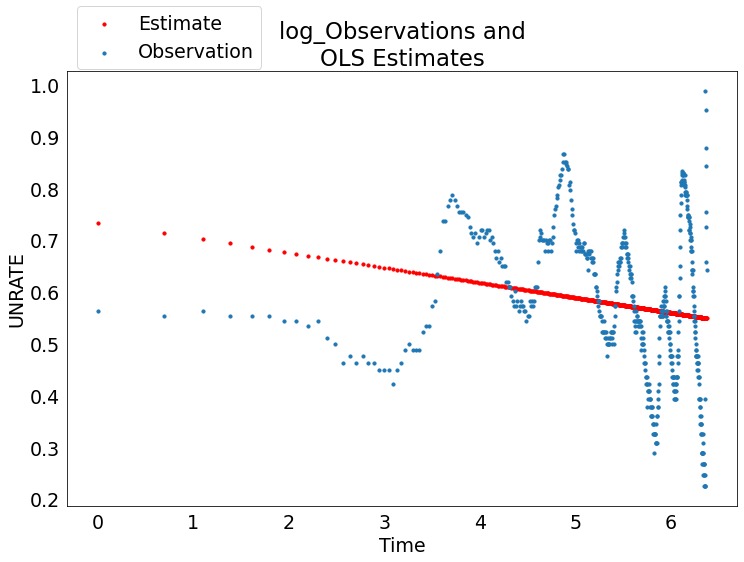

In [27]:
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
pp = PdfPages("log_UNRATERegressionPlots.pdf")

def plot_scatter_with_estimator(title, data, x_vars, y_var, pp = None):
    fig = plt.rcParams.update({"font.size":19})
    y = y_var[0]
    for x in x_vars:
        fig, ax = plt.subplots(figsize=(12,8))
        y_label1 = "Estimate"
        y_label2 = "Observation"
        data.plot.scatter(x=x, y=y + " estimator", ax = ax, c = "r",
                         s = 10, label = y_label1, legend = False)
        plt.ylabel("")
        data.plot.scatter(x = x, y = y, ax = ax, s = 10, 
                          label = y_label2, legend = False)
        plt.legend(loc="upper left", labels = [y_label1, y_label2],
                  bbox_to_anchor = (0, 1.17))
        
        plt.title("log_Observations and\nOLS Estimates")
        ax.xaxis.set_ticks_position("none")
        ax.yaxis.set_ticks_position("none")
        pp.savefig(fig, bbox_inches = "tight")
plot_scatter_with_estimator("Plot", reg.data, x_vars, y_var, pp)
pp.close()

You created an instance of Stats


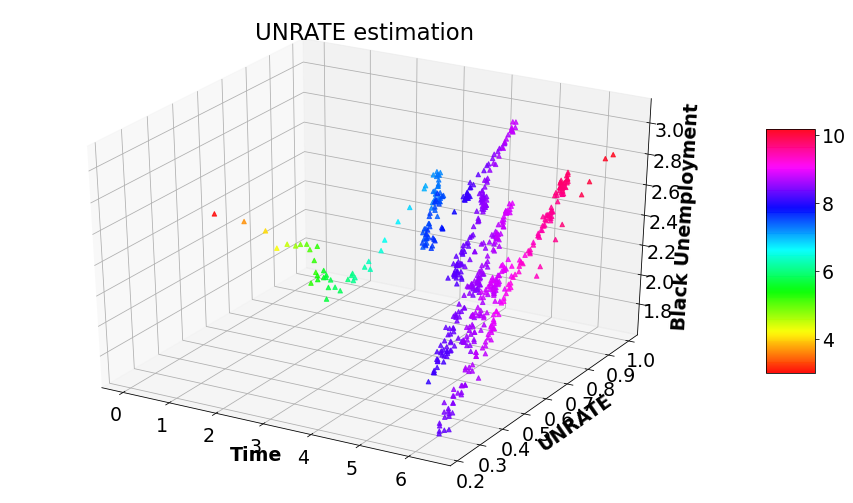

In [28]:
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

data = pd.read_csv("file2.csv", index_col = "DATE")

x = data["Time"]
y = data["UNRATE"]
z = data["Black Unemployment"]
reg = Regression()
reg.OLS("log_UNRATE", data, y_var, x_vars)
 
fig = plt.figure(figsize = (16, 9))
ax = plt.axes(projection ="3d")
   
ax.grid(b = True, color ='grey', 
        linestyle ='-.', linewidth = 0.3, 
        alpha = 0.2) 

my_cmap = plt.get_cmap('hsv')
 

sctt = ax.scatter3D(x, y, z,
                    alpha = 0.8,
                    c = (x + y + z), 
                    cmap = my_cmap, 
                    marker ='^')
 
plt.title("UNRATE estimation")
ax.set_xlabel('Time', fontweight ='bold') 
ax.set_ylabel('UNRATE', fontweight ='bold') 
ax.set_zlabel('Black Unemployment', fontweight ='bold')
fig.colorbar(sctt, ax = ax, shrink = 0.5, aspect = 5)
 

plt.show()